# Imports


In [18]:
%load_ext autoreload
%autoreload 2
import os


while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [20]:
umap_path = "./data/final_512d_brightness.csv"
umap_data = np.loadtxt(umap_path, delimiter=",")

embeddings_path= "./data/full_brightness_embeddings.csv"
embeddings_data = np.loadtxt(embeddings_path, delimiter=",")

In [21]:
umap_data.shape
embeddings_data.shape

(2000, 512)

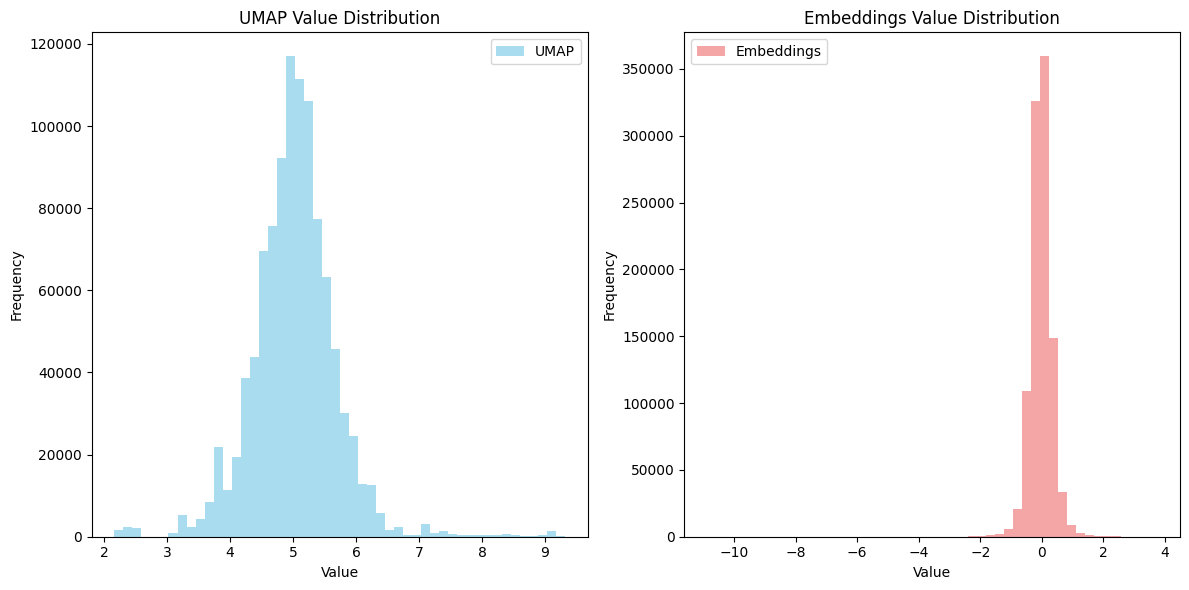

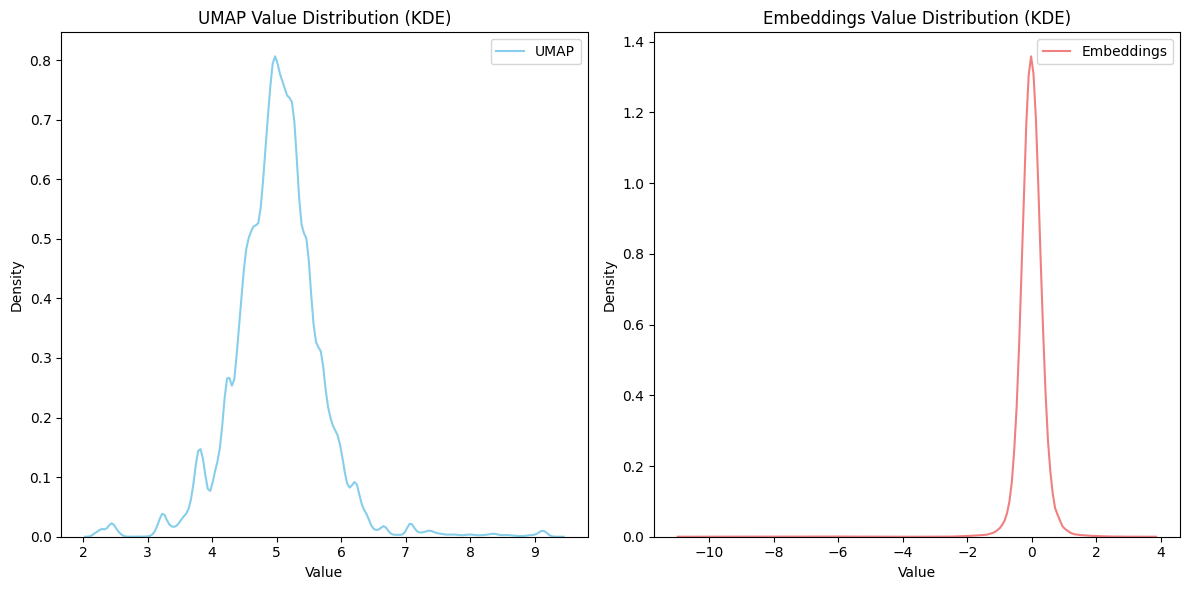

C:\Users\manse\AppData\Local\Temp\ipykernel_42368\1566507473.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([umap_flat, embeddings_flat], labels=["UMAP", "Embeddings"])


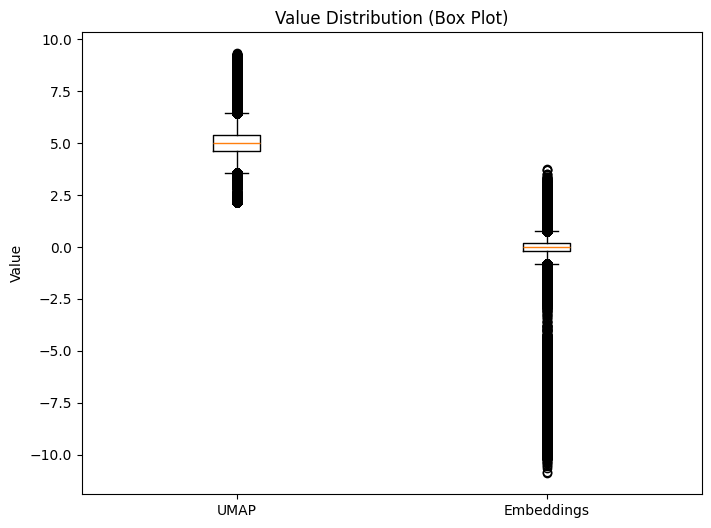

UMAP Statistics:
count    1.024000e+06
mean     5.015772e+00
std      6.846101e-01
min      2.161958e+00
25%      4.640339e+00
50%      5.018664e+00
75%      5.367241e+00
max      9.318887e+00
dtype: float64

Embeddings Statistics:
count    1.024000e+06
mean    -2.335482e-02
std      4.738017e-01
min     -1.088860e+01
25%     -2.121070e-01
50%     -1.443834e-02
75%      1.862632e-01
max      3.763686e+00
dtype: float64


In [ ]:
# 1. Flatten the arrays (if you want to treat all values together):
umap_flat = umap_data.flatten()
embeddings_flat = embeddings_data.flatten()

# 2. Plotting the distributions:

# a. Histograms:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(umap_flat, bins=50, alpha=0.7, label="UMAP", color="skyblue")  # Adjust bins and alpha
plt.title("UMAP Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(embeddings_flat, bins=50, alpha=0.7, label="Embeddings", color="lightcoral")
plt.title("Embeddings Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout() # Adjust subplot params so that subplots fit in to the figure area.
plt.show()

# b. KDE plots (Kernel Density Estimation - smoother representation):

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(umap_flat, label="UMAP", color="skyblue")  # Use seaborn for KDE
plt.title("UMAP Value Distribution (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(embeddings_flat, label="Embeddings", color="lightcoral")
plt.title("Embeddings Value Distribution (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


# c. Box Plots:
plt.figure(figsize=(8, 6))
plt.boxplot([umap_flat, embeddings_flat], labels=["UMAP", "Embeddings"])
plt.title("Value Distribution (Box Plot)")
plt.ylabel("Value")
plt.show()


# 3. Descriptive Statistics (for numerical comparison):
print("UMAP Statistics:")
print(pd.Series(umap_flat).describe())

print("\nEmbeddings Statistics:")
print(pd.Series(embeddings_flat).describe())

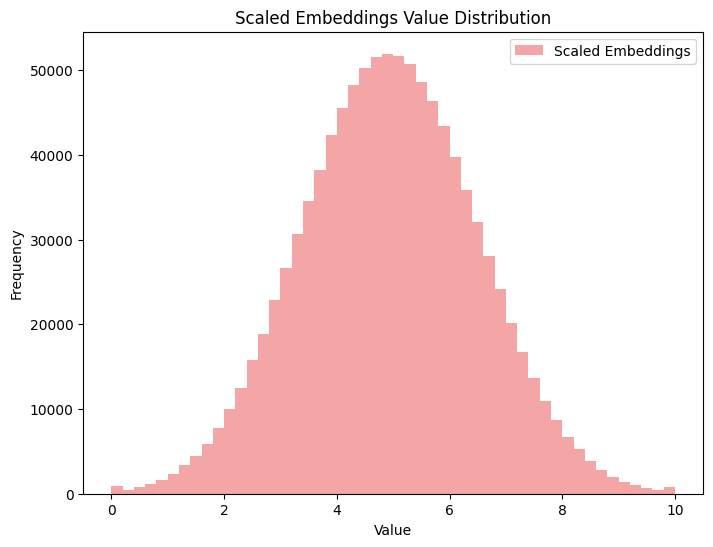

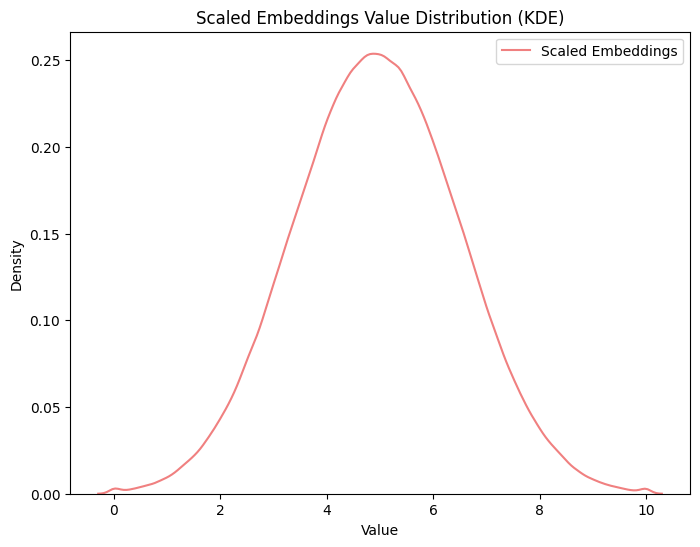

C:\Users\manse\AppData\Local\Temp\ipykernel_42368\904135811.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(embeddings_scaled_flat, labels=["Scaled Embeddings"])  # No need for two boxes now


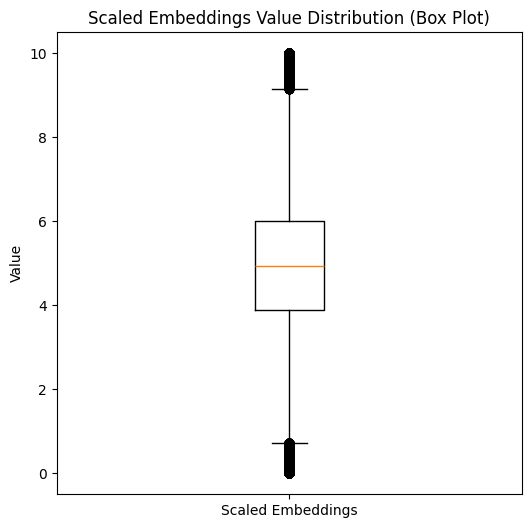

Scaled Embeddings Statistics:
count    1.024000e+06
mean     4.941904e+00
std      1.548092e+00
min      0.000000e+00
25%      3.885357e+00
50%      4.936718e+00
75%      5.994992e+00
max      1.000000e+01
dtype: float64


In [27]:
# 1. Scale the embeddings data (0 to 10):
scaler = MinMaxScaler(feature_range=(0, 10))
embeddings_scaled = scaler.fit_transform(embeddings_data)

# 2. Flatten the scaled array for distribution plots:
embeddings_scaled_flat = embeddings_scaled.flatten()

# 3. Plotting the distributions (only for the scaled embeddings):

# a. Histograms:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.hist(embeddings_scaled_flat, bins=50, alpha=0.7, label="Scaled Embeddings", color="lightcoral")
plt.title("Scaled Embeddings Value Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# b. KDE plots:
plt.figure(figsize=(8, 6))
sns.kdeplot(embeddings_scaled_flat, label="Scaled Embeddings", color="lightcoral")
plt.title("Scaled Embeddings Value Distribution (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# c. Box Plot:
plt.figure(figsize=(6, 6))
plt.boxplot(embeddings_scaled_flat, labels=["Scaled Embeddings"])  # No need for two boxes now
plt.title("Scaled Embeddings Value Distribution (Box Plot)")
plt.ylabel("Value")
plt.show()


# 4. Descriptive Statistics (for the scaled embeddings):
print("Scaled Embeddings Statistics:")
print(pd.Series(embeddings_scaled_flat).describe())

In [28]:
# output_path = "./data/scaled_embeddings.csv"  # Choose your desired output path and filename
# np.savetxt(output_path, embeddings_scaled, delimiter=",")